In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Mexico','data')

In [3]:
STATES = gpd.read_file(os.path.join('..','..','geometry','MX_states.geojson'))

In [4]:
INFO = pd.read_csv(os.path.join(dir_base,'INFO.csv'))
INFO.head(3)

,Id,Nombre,Estado,Municipio,Situacion,Latitud,Longitud,Altitud
0,1001,AGUASCALIENTES (OBS),AGUASCALIENTES,AGUASCALIENTES,OPERANDO,21.850278,-102.290833,1890.8
1,1004,CAÑADA HONDA,AGUASCALIENTES,AGUASCALIENTES,OPERANDO,22.000833,-102.198889,1925.0
2,1005,PRESA EL NIAGARA,AGUASCALIENTES,AGUASCALIENTES,OPERANDO,21.780556,-102.371667,1844.0


In [15]:
conteo_estados = INFO['Estado'].value_counts()
conteo_estados

Estado
BAJA CALIFORNIA SUR                104
SAN LUIS POTOSÍ                     91
JALISCO                             80
MÉXICO                              72
VERACRUZ DE IGNACIO DE LA LLAVE     72
GUERRERO                            69
GUANAJUATO                          68
ZACATECAS                           68
BAJA CALIFORNIA                     66
AGUASCALIENTES                      59
DURANGO                             57
COLIMA                              57
SONORA                              52
YUCATÁN                             52
HIDALGO                             51
CAMPECHE                            41
COAHUILA DE ZARAGOZA                40
NUEVO LEÓN                          38
MORELOS                             31
MICHOACÁN DE OCAMPO                 30
PUEBLA                              28
OAXACA                              28
QUINTANA ROO                        28
TABASCO                             27
TAMAULIPAS                          27
TLAXCALA          

In [16]:
STATES

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-102.7453 21.72005, -102.74859..."
1,MX-COL,4,administrative,México,MX,Colima,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"MULTIPOLYGON (((-98.5415 19.46082, -98.54158 1..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,None,None,None,state,DIF,boundary,Q1489,en:Mexico City,"MULTIPOLYGON (((-99.2787 19.1317, -99.28259 19..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"MULTIPOLYGON (((-98.90339 19.03848, -98.90061 ..."
5,MX-MEX,4,administrative,México,MX,México,Mexico,México,Meksyk,Мехико,Мехіко,state,MEX,boundary,Q82112,es:Estado de México,"MULTIPOLYGON (((-100.13794 20.04431, -100.1375..."
6,MX-HID,4,administrative,México,MX,Hidalgo,Hidalgo,Hidalgo,Hidalgo,Идальго,Ідальго,state,HID,boundary,Q80903,es:Estado de Hidalgo,"MULTIPOLYGON (((-99.73527 20.56486, -99.73525 ..."
7,MX-PUE,4,administrative,México,MX,Puebla,Puebla,Puebla,Puebla,Пуэбла,Пуебла,state,PUE,boundary,Q79923,es:Puebla,"MULTIPOLYGON (((-97.26671 19.38249, -97.26549 ..."
8,MX-NLE,4,administrative,México,MX,Nuevo León,Nuevo León,Nuevo León,Nuevo León,Нуэво-Леон,Нуево-Леон,state,NLE,boundary,Q15282,es:Nuevo León,"MULTIPOLYGON (((-99.94766 23.49713, -99.94611 ..."
9,MX-COA,4,administrative,México,MX,Coahuila de Zaragoza,Coahuila,Coahuila de Zaragoza,Coahuila,Коауила,Коауїла,state,COA,boundary,Q53079,es:Coahuila de Zaragoza,"MULTIPOLYGON (((-103.50895 25.27801, -103.5098..."


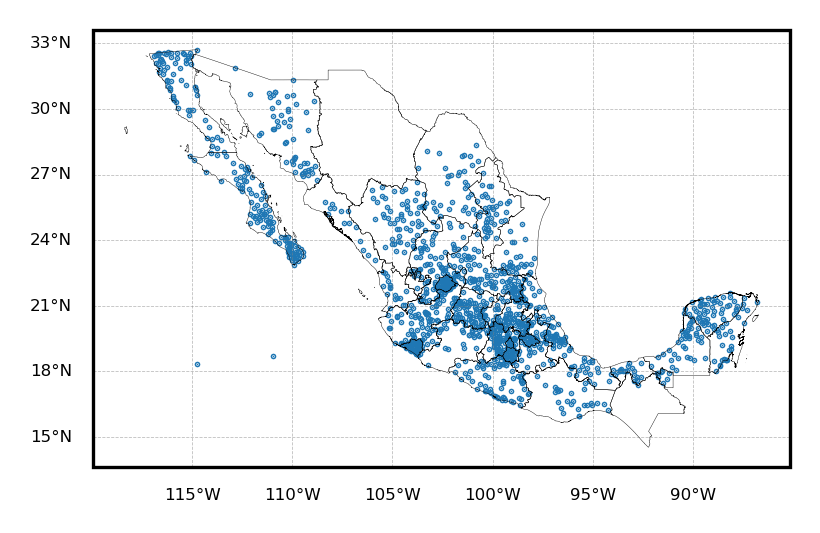

In [13]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(3,3),dpi=300)
gs = gridspec.GridSpec(1,1)

# =====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
STATES.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)
ax1.scatter(INFO['Longitud'],INFO['Latitud'],s=0.5,marker='.')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}